# Mariana Maroto Homework 1
## KNN

### Part A. Model Code

#### 1. Function for Euclidean Distance

In [1]:
# Formula to calculate Euclidean distance of two vectors
# a and b are vectors
def euc(a,b):
    z = 0
    for (i,j) in zip(a, b):
        sum = (i-j)**2
        z = z + sum
    z = z**(1/2)
    return z

# check if it works
a = [1,2,3]
b = [4,5,6]
print(euc(a,b))

5.196152422706632


#### 2. Function for Manhattan Distance

In [2]:
# Formula to calculate Manhattan distance of two vectors
# a and b are vectors
def manh(a,b):
    z = 0
    for (i,j) in zip(a, b):
        sum = abs(i-j)
        z = z + sum
    return z

# check if it works
a = [1,2,3]
b = [4,5,6]
print(manh(a,b))

9


#### 3. Accuracy and Generalization Error

In [3]:
def accuracy(y_true, y_pred):
    correct = 0
    for (true, pred) in zip (y_true, y_pred):
        if true == pred:
            correct = correct + 1
    accuracy = correct/len(y_true)
    gen_error = 1 - accuracy
    return accuracy, gen_error

# check if it works
a = [1,0,1,1,1,1]
b = [1,0,1,1,1,0]
print(accuracy(a,b))

(0.8333333333333334, 0.16666666666666663)


#### 4. Precision, Recall, and F1 Scores

In [4]:
def precision (y_true, y_pred):
    TP = FP = 0
    for i in range(len(y_pred)): 
        if y_true[i] == y_pred[i] == 1:
            TP += 1
        if (y_pred[i] == 1) and (y_true[i] != y_pred[i]):
            FP += 1
    precision = (TP/(TP+FP))
    return precision

def recall (y_true, y_pred):
    TP = FN = 0
    for i in range(len(y_pred)): 
        if y_true[i] == y_pred[i] == 1:
            TP += 1
        if (y_pred[i] == 0) and (y_true[i] != y_pred[i]):
            FN += 1
    recall = (TP/(TP+FN))
    return recall

def f1score (y_true, y_pred):
    TP = FN = FP = 0
    for i in range(len(y_pred)): 
        if y_true[i] == y_pred[i] == 1:
            TP += 1
        if (y_pred[i] == 1) and (y_true[i] != y_pred[i]):
            FP += 1
        if (y_pred[i] == 0) and (y_true[i] != y_pred[i]):
            FN += 1
    f1score = (TP/(TP+((FN+FP)/2)))
    return f1score

# check if it works
a = [1,0,1,1,1,1]
b = [1,1,1,1,1,0]
print(precision(a,b), recall(a,b), f1score(a,b))

0.8 0.8 0.8


#### 5. Confusion Matrix of Two Vectors

In [5]:
# could use method similar as above, but this applies for more number of classes...
import numpy as np

def confusion_matrix(y_true, y_pred):
    nclasses = len(np.unique(y_true)) 
    cm = np.zeros((nclasses, nclasses))

    for i in range(len(y_true)):
        cm[y_true[int(i)]][y_pred[int(i)]] += 1

    return cm

# check if it works
a = [1,0,1,1,1,1,0]
b = [1,1,1,1,1,0,0]
confusion_matrix(a,b)

array([[1., 1.],
       [1., 4.]])

#### 6. ROC Curve

In [6]:
import matplotlib.pyplot as plt
def plot_roc(actuals, scores):
    
    # generate 100 thresholds
    thresholds = np.linspace(0, 1, num=100) 

    # calculate confusion matrices for all thresholds
    TPR_list = []
    FPR_list = []
    
    for threshold in thresholds:
        tp=fp=tn=fn=0
        bool_actuals = [act==1 for act in actuals]
        for truth, score in zip(bool_actuals, scores):
            if score > threshold:                       
                if truth:                               
                    tp += 1
                else:                                                
                    fp += 1          
            else:                                       
                if not truth:                           
                    tn += 1                          
                else:                                   
                    fn += 1

        cm = {'tp' : tp,'fp' : fp, 'tn' : tn, 'fn' : fn}

        # apply functions to confusion matrices 
        FPR = cm['fp'] / (cm['fp'] + cm['tn']) if (cm['fp'] + cm['tn'])!=0 else 0
        TPR = cm['tp'] / (cm['tp'] + cm['fn']) if (cm['tp'] + cm['fn'])!=0 else 0
        TPR_list.append(TPR)
        FPR_list.append(FPR)

    #Plotting
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    ax.plot(FPR_list, TPR_list)
    ax.plot(thresholds,thresholds, "--")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title("ROC Curve", fontsize=14)
    ax.set_ylabel('TPR', fontsize=12)
    ax.set_xlabel('FPR', fontsize=12)

#### 7. AUC

In [7]:
def auc(actuals, scores):
    
    # generate 100 thresholds
    thresholds = np.linspace(0, 1, num=100) 

    # calculate confusion matrices for all thresholds
    TPR_list = []
    FPR_list = []
    area = 0
    FPR_LAST = 0
    TPR_LAST = 0
    
    for threshold in thresholds:
        tp=fp=tn=fn=0
        bool_actuals = [act==1 for act in actuals]
        for truth, score in zip(bool_actuals, scores):
            if score > threshold:                       
                if truth:                               
                    tp += 1
                else:                                                
                    fp += 1          
            else:                                       
                if not truth:                           
                    tn += 1                          
                else:                                   
                    fn += 1

        cm = {'tp' : tp,'fp' : fp, 'tn' : tn, 'fn' : fn}

        # apply functions to confusion matrices 
        FPR = cm['fp'] / (cm['fp'] + cm['tn']) if (cm['fp'] + cm['tn'])!=0 else 0
        TPR = cm['tp'] / (cm['tp'] + cm['fn']) if (cm['tp'] + cm['fn'])!=0 else 0
        TPR_list.append(TPR)
        FPR_list.append(FPR)        
        area = area + (FPR_LAST - FPR) * TPR_LAST
        FPR_LAST = FPR
        TPR_LAST = TPR
    
    return area

#### 8. Precision and Recall Curve

In [8]:
import matplotlib.pyplot as plt
def plot_precision_recall(actuals, scores):

    # generate 100 thresholds
    thresholds = np.linspace(0, 1, num=100) 

    # calculate confusion matrices for all thresholds
    TPR_list = []
    Precision_list = []
    
    for threshold in thresholds:
        tp=fp=tn=fn=0
        bool_actuals = [act==1 for act in actuals]
        for truth, score in zip(bool_actuals, scores):
            if score > threshold:                       
                if truth:                               
                    tp += 1
                else:                                                
                    fp += 1          
            else:                                       
                if not truth:                           
                    tn += 1                          
                else:                                   
                    fn += 1

        cm = {'tp' : tp,'fp' : fp, 'tn' : tn, 'fn' : fn}

        # apply functions to confusion matrices 
        Precision = cm['tp'] / (cm['tp'] + cm['fp']) if (cm['tp'] + cm['fp'])!=0 else 0
        TPR = cm['tp'] / (cm['tp'] + cm['fn']) if (cm['tp'] + cm['fn'])!=0 else 0
        TPR_list.append(TPR)
        Precision_list.append(Precision)    
    
    #Plotting
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    ax.plot(thresholds, Precision_list, label = 'Precision')
    ax.plot(thresholds, TPR_list, label = 'Recall')
    ax.set_ylim([0,1])
    ax.set_xlim([0,1])
    ax.legend()
    ax.set_title("Precision-Recall Curve", fontsize=14)
    ax.set_xlabel('Threshold', fontsize=12)

#### 9. KNN_Classifier

In [9]:
#KNN Classifier Can also be Run for Probabilities
import operator

# updated so that _init_self includes n_neighbors, distfxn, and weights so that I can run different sfolds with a for loop
class KNN_Classifier(object):
    
    def __init__(self, n_neighbors, weights, distfxn):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.distfxn = distfxn
        
    def fit(self, X, Y, *kwargs): 
        self.X_train = X
        self.Y_train = Y  
        self.kwargs = kwargs
    
    def euc(a,b):
        z = 0
        for (i,j) in zip(a, b):
            sum = (i-j)**2
            z = z + sum
        z = z**(1/2)
        return z
    
    def manh(a,b):
        z = 0
        for (i,j) in zip(a, b):
            sum = abs(i-j)
            z = z + sum
        return z

    def predict(self, X):
        
        predictions = []
        probabilities = dict()
        zeroesdist = []
        onesdist = []
        
        for i in range(len(X)):            
            # calculate the distance according to specified
            if self.distfxn == 'eucledian':
                dist = np.array([euc(X[i], x_t) for x_t in self.X_train])
            elif self.distfxn == 'manhattan':
                dist = np.array([manh(X[i], x_t) for x_t in self.X_train])
            
            # sort the distances and return the indices and distances of K neighbors
            dist_sorted = {'index' : dist.argsort()[:self.n_neighbors], 'distance' : sorted(dist)[:self.n_neighbors]}
            
            # get the neighbors
            neigh_count = {}
 
            # for each neighbor find the class, weight or not depending on self.weights
            for d in dist_sorted['index']:
                
                # if user selected no weighting
                if self.weights == 'uniform':
                    if self.Y_train[d] in neigh_count:
                        neigh_count[self.Y_train[d]] += 1
                    else:
                        neigh_count[self.Y_train[d]] = 1
                
                # if user selected inverse weighting
                elif self.weights == 'distance':
                    i = 0
                    dist = dist_sorted['distance'][i] if (dist_sorted['distance'][i])!=0 else 0.000000000000000000000001
                    if self.Y_train[d] in neigh_count:
                        neigh_count[self.Y_train[d]] += (1/dist) 
                    else:
                        neigh_count[self.Y_train[d]] = (1/dist)
                    i = i + 1
            
            # sort by closest neighbor
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
            # append the class label to the list
            predictions.append(sorted_neigh_count[0][0])
            
            # if no neighbors with class 0 or 1 then make the count 0. 
            try:
                count_0 = neigh_count[0]
            except KeyError:
                count_0 = 0
            try:
                count_1 = neigh_count[1]
            except KeyError:
                count_1 = 0
            zero_prob = count_0/(count_0 + count_1) 
            one_prob = count_1/(count_0 + count_1) 
            zeroesdist.append(zero_prob)
            onesdist.append(one_prob)
            probabilities = {'class 0': zeroesdist , 'class 1' : onesdist}
        return predictions, probabilities

### Part B. Data Processing

#### 10. Read Dataset

In [10]:
import pandas as pd
%cd C:/Users/MarianaMaroto/Desktop/MS in Data Science/74020 Machine Learning/HW 1 - KNN
df = pd.read_csv('winequalitywhite.csv', sep=";")
df.shape

C:\Users\MarianaMaroto\Desktop\MS in Data Science\74020 Machine Learning\HW 1 - KNN


(4898, 12)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### 11. Create Target column, depending on quality

In [12]:
df.loc[df['quality'] > 5, 'target'] = 1
df.loc[df['quality'] <= 5, 'target'] = 0
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1.0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1.0


#### 12. Summarize All Variables in the dataset

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


#### 13. Shuffle rows of data

In [14]:
df = df.sample(frac=1)
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
3533,6.6,0.22,0.30,14.70,0.045,50.0,136.0,0.99704,3.14,0.37,10.6,6,1.0
3425,7.1,0.17,0.40,14.55,0.047,47.0,156.0,0.99945,3.34,0.78,9.1,6,1.0
3857,5.4,0.17,0.27,2.70,0.049,28.0,104.0,0.99224,3.46,0.55,10.3,6,1.0
3912,6.5,0.33,0.30,3.80,0.036,34.0,88.0,0.99028,3.25,0.63,12.5,7,1.0
1009,8.3,0.15,0.39,1.30,0.055,32.0,146.0,0.99300,3.08,0.39,10.5,6,1.0


#### 14. Generate Pair Plots

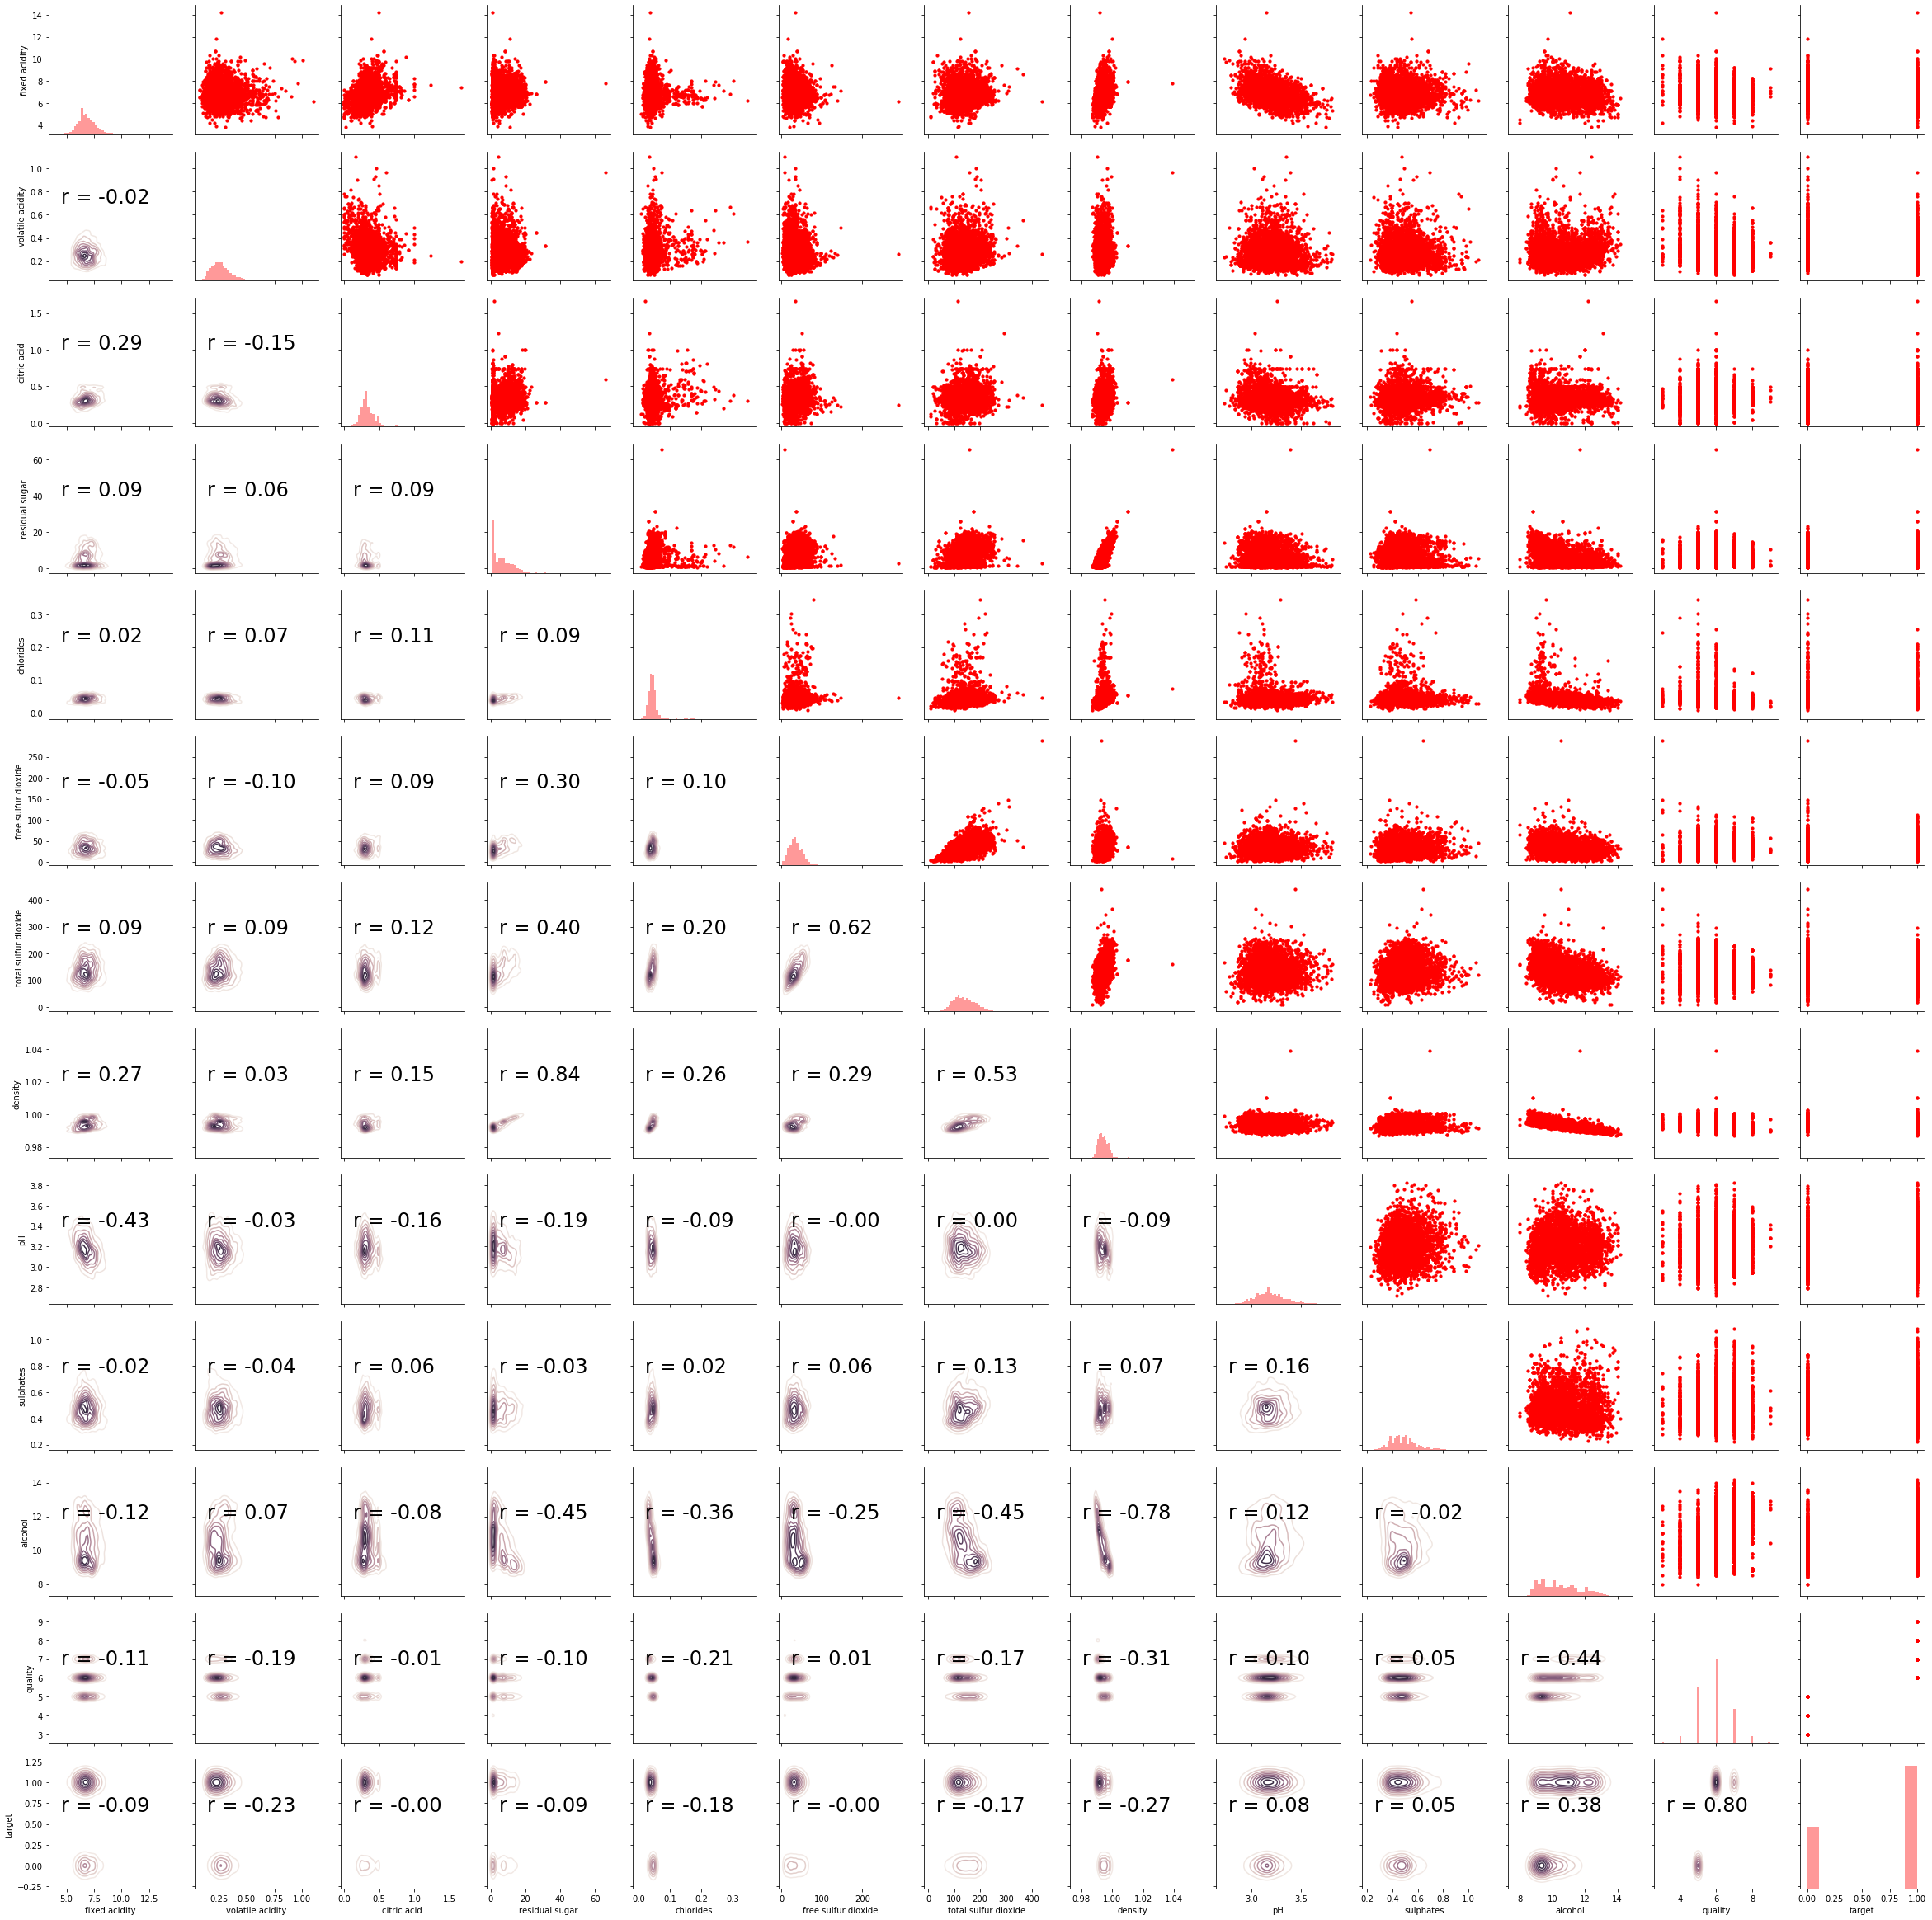

In [15]:
import warnings
warnings.filterwarnings('ignore')


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

#See https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

#### 15. Drop redundant features

In [16]:
df = df.drop(labels=['quality', 'citric acid', 'free sulfur dioxide'], axis = 1) 
# dropped those with zero correlation and the variable used for creating target variable

#### 16. Partition Function

In [17]:
import numpy as np

def partition(X, y, t):
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, (1-t)*100)
    X_train = np.array(X[split])
    y_train = np.array(y[split])
    X_test =  np.array(X[~split])
    y_test = np.array(y[~split])
    return X_train, y_train, X_test, y_test

y = df['target'] # 1D targer vector
X = df.drop(labels='target', axis=1)
X_train, y_train, X_test, y_test = partition(X, y, t=0.2)

# Just to check
print(len(X_train))
print(type(X_train))
print(len(y_train))
print(type(y_train))
print(len(X_test))
print(type(X_test))
print(len(y_test))
print(type(y_test))

3918
<class 'numpy.ndarray'>
3918
<class 'numpy.ndarray'>
980
<class 'numpy.ndarray'>
980
<class 'numpy.ndarray'>


#### 17. Naively run KNN_Classifier model with k = 5 and Euclidean Distance on TRAINING Dataset

In [18]:
# Create KNN Object
model = KNN_Classifier(n_neighbors = 5, weights ='uniform', distfxn = 'eucledian')

# Fit and Predict
model.fit(X = X_train, Y = y_train)
model.predict, probs = model.predict(X = X_train)

In [19]:
# a. Show accuracy, and F1 Score
print(accuracy(y_train, model.predict))
print(f1score(y_train, model.predict))

(0.8044920877998979, 0.1955079122001021)
0.8583579881656804


In [20]:
# b. Scale/Standarize
mean = np.mean(X_train, axis = 0)
print(mean)
std = np.std(X_train, axis = 0)
print(std)
scale = np.frompyfunc(lambda x, mean, std: (x - mean) / (std), 3, 1)

X_train_scaled = scale(X_train, mean, std).astype(float)
X_test_scaled = scale(X_test, mean, std).astype(float)

[6.86211077e+00 2.77632721e-01 6.40088055e+00 4.58739153e-02
 1.38771312e+02 9.94024860e-01 3.18642675e+00 4.89042879e-01
 1.05183529e+01]
[8.32109542e-01 9.93328543e-02 5.09661629e+00 2.24529098e-02
 4.26976938e+01 3.01900063e-03 1.49432630e-01 1.12267354e-01
 1.23902903e+00]


In [21]:
# c. Rerun with scaled training set. 
# Create KNN Object
modelscaled = KNN_Classifier(n_neighbors = 5, weights ='uniform', distfxn = 'eucledian')

# Fit and Predict
modelscaled.fit(X = X_train_scaled, Y= y_train)
modelscaled.predict, probs = modelscaled.predict(X = X_train_scaled)

In [22]:
print(accuracy(y_train, modelscaled.predict))
print(f1score(y_train, modelscaled.predict))

(0.8356304236855538, 0.16436957631444615)
0.8791291291291291


In [23]:
# d. It seems like it is better to run it scaled, if not the model gives more weight to features with higher magnitude...

In [24]:
# e. Test Weighting
# Create KNN Object
modelw = KNN_Classifier(n_neighbors = 5, weights ='distance', distfxn = 'eucledian')

# Fit and Predict
modelw.fit(X = X_train_scaled, Y = y_train)
modelw.predict, probs = modelw.predict(X = X_train_scaled)

In [25]:
print(accuracy(y_train, modelw.predict))
print(f1score(y_train, modelw.predict))

(0.8356304236855538, 0.16436957631444615)
0.8791291291291291


#### 18. Naively run KNN_Classifier model with k = 5 and Euclidean Distance on TRAINING Dataset

In [26]:
import random
def sFold(folds, data, labels, model, *model_args, error_function): 
    
    all_data = np.c_[data, labels]
    # i. helper function which creates data_splits
    data_splits = list()
    data_copy = list(all_data)
    fold_size = int(len(data_copy) / folds)
    
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = random.randrange(len(data_copy))
            fold.append(data_copy.pop(index))
        data_splits.append(fold)

    # ii. for each partition, make model, remove one fold, make predictuion, store prediction
    model = model
    scores = list()
    expected = list()
    predicted = list()
    
    for ds in data_splits:
        train_set = list(data_splits)
        train_set = [ x for x in train_set if not (x==np.array(ds)).all()]
        train_set = sum(train_set,[])
        test_set = list()
        for row in ds:
            row_copy = list(row)
            test_set.append(row_copy)
        
        y_train = [row[-1] for row in train_set]
        train_set = [train[:-1] for train in train_set]
        
        model.fit(X = train_set, Y = y_train)
        
        actual = [row[-1] for row in test_set]
        test_set = [test[:-1] for test in test_set]
        
        # Make prediction in current partition
        estimate, probs = model.predict(test_set, *model_args)
        acc = error_function(actual, estimate)
        
        scores.append(acc)
        expected.append(actual)
        predicted.append(estimate)
        
    average_scores = sum(scores)/len(scores)
    final_dict = {'expected' : expected, 'predicted' : predicted, 'average error' : average_scores}
    
    return final_dict

#### 19. Evaluate Using Sfold Function for the following combinations

In [27]:
# test sFold function
evaluate = sFold(folds = 4, data = X_train_scaled, labels = y_train, model = KNN_Classifier(n_neighbors = 5, weights = 'uniform', distfxn = 'eucledian'), error_function = f1score)
print(evaluate['average error'])

0.8173902995527838


In [28]:
# Set the the ranges
neighbors = [1,5,9,11]
weighted = ['uniform','distance']
distance_type = ['eucledian', 'manhattan']

performance_list = list() # List to store dictionaries of each
for n in neighbors:
    for w in weighted:
        for d in distance_type:
            print(str(n) + ' ' + w + ' ' + d )
            # Run the sFold for each one
            evaluate = sFold(folds = 4, data = X_train_scaled, labels = y_train, model = KNN_Classifier(n_neighbors = n, weights = w, distfxn = d), error_function = f1score)
            performance_list.append(evaluate)

1 uniform eucledian
1 uniform manhattan
1 distance eucledian
1 distance manhattan
5 uniform eucledian
5 uniform manhattan
5 distance eucledian
5 distance manhattan
9 uniform eucledian
9 uniform manhattan
9 distance eucledian
9 distance manhattan
11 uniform eucledian
11 uniform manhattan
11 distance eucledian
11 distance manhattan


In [29]:
# get all mean f1 scores to see which one was best!!!
from operator import itemgetter 
final_f1_scores = list(map(itemgetter('average error'), performance_list))
print(final_f1_scores)

[0.8296682412663658, 0.8363344862937504, 0.8294863806077286, 0.831860051823628, 0.8191281152697103, 0.8202828948751506, 0.8222427886006989, 0.8245866001777569, 0.8243622981527037, 0.8218526367833556, 0.8208139635175029, 0.8203135556933336, 0.8239649572651545, 0.8266722009647509, 0.8253780039811622, 0.820112159403068]


#### 20. Evaluate Model on Test Data

In [30]:
# Run final model with best f1 score
# Create KNN Object
model_final = KNN_Classifier(n_neighbors = 9, weights ='distance', distfxn = 'manhattan')

# Fit and Predict
model_final.fit(X = X_train_scaled, Y = y_train)
preds, probs = model_final.predict(X = X_test_scaled)

In [31]:
# a. precision
print(precision(y_test, preds))

0.7962154294032023


In [32]:
# b. recall
print(recall(y_test, preds))

0.8338414634146342


In [33]:
# c. F1 Score
print(f1score(y_test, preds))

0.8145941921072226


In [34]:
# d. Confusion Matrix
y_test_cm = np.asarray(y_test)
preds_cm = np.asarray(preds)
confusion_matrix(y_test_cm.astype(int), preds_cm.astype(int))

array([[184., 140.],
       [109., 547.]])

In [35]:
# e. Accuracy & Generalization Error
print(accuracy(y_test, preds))

(0.7459183673469387, 0.2540816326530613)


#### 21. ROC Curve

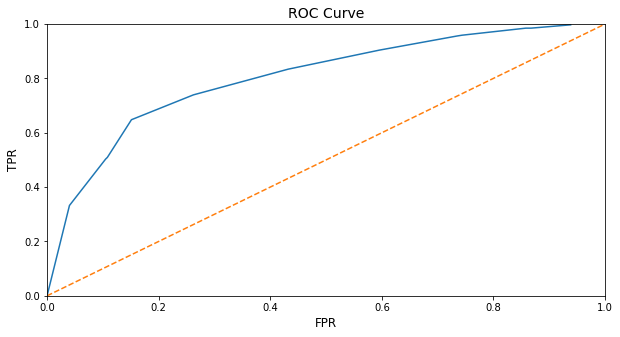

In [36]:
onesdist = probs['class 1']
zerodist = probs['class 0']
plot_roc(y_test, onesdist)

#### 22. Calculate AUC

In [37]:
# Calculate AUC
auc(y_test, onesdist)

0.7810429840409515

#### 23. Generate Precision-Recall Curve

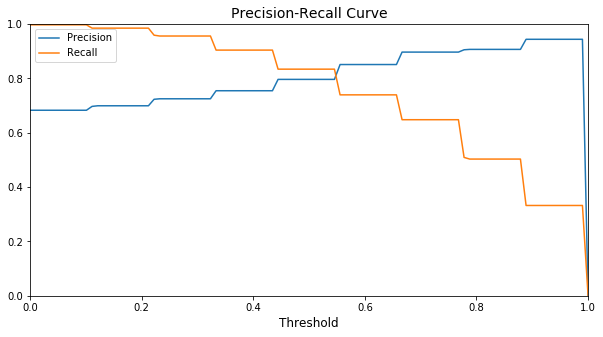

In [38]:
plot_precision_recall(y_test, onesdist)

#### 24. 95% CI On Generalization Error

In [39]:
from math import sqrt
# z = 1.96 for 95% CI
z = 1.96
acc, gen_error = accuracy(y_test, preds)
standard_error = sqrt(gen_error*(1 - gen_error)/len(y_test))
lower_bound = gen_error - (z * standard_error)
upper_bound = gen_error + (z * standard_error)

print(lower_bound)
print(upper_bound)

0.22682480426314122
0.2813384610429813


In [40]:
# Extra, Elbow Graph to find optimal k
error_rate = []

# Takes some time
for i in range(1,20):
    print(i)
    knn = KNN_Classifier(n_neighbors = i, weights ='distance', distfxn = 'manhattan')
    knn.fit(X_train_scaled,y_train)
    pred_i, probs_i = knn.predict(X_test_scaled)
    acc, gen_error = accuracy(y_test, pred_i)
    error_rate.append(gen_error)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


[0.2081632653061225, 0.2081632653061225, 0.2551020408163265, 0.23469387755102045, 0.2602040816326531, 0.23979591836734693, 0.263265306122449, 0.22857142857142854, 0.2540816326530613, 0.25, 0.25306122448979596, 0.2438775510204082, 0.2438775510204082, 0.2326530612244898, 0.2438775510204082, 0.2387755102040816, 0.24285714285714288, 0.2387755102040816, 0.2377551020408163]


Text(0, 0.5, 'Error Rate')

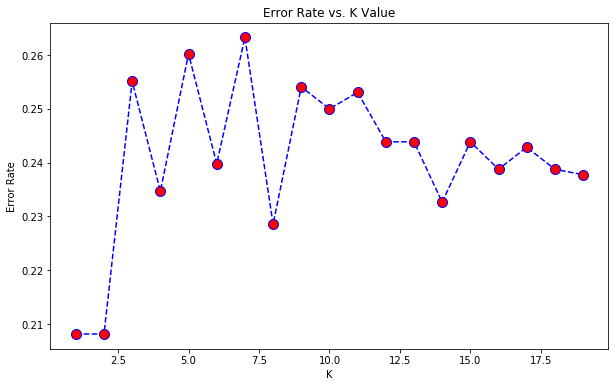

In [41]:
print(error_rate)
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')